DEPENDECIES: NUMPY,MATPLOTLIB,SEABORN,SCI-KIT LEARN,XGBOOST,PILLOW

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
# Load MNIST dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target  # Features and labels

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


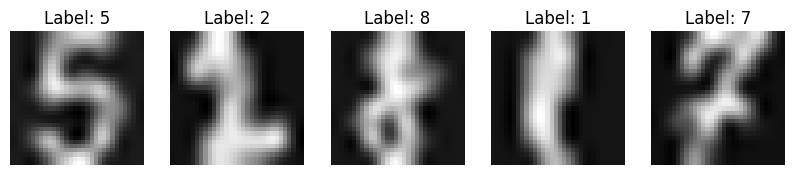

In [32]:
import cv2

# Function to display MNIST images using OpenCV processing
def show_mnist_images_cv(X, y, num_images=5, upscale_factor=4):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    
    for i, ax in enumerate(axes):
        img_data = X[i].reshape(8, 8)  # Reshape to 8x8 (since sklearn's MNIST is 8x8)
        
        # Normalize and upscale the image
        img = cv2.resize(img_data, (8 * upscale_factor, 8 * upscale_factor), interpolation=cv2.INTER_CUBIC)
        
        # Apply Gaussian blur to reduce noise (optional)
        img = cv2.GaussianBlur(img, (3, 3), 0)
        
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {y[i]}")
        ax.axis('off')

    plt.show()

# Display first 5 MNIST images with OpenCV processing
show_mnist_images_cv(X_test, y_test)


In [12]:
# Scale data (SVM benefits from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
models = {
    "SVM": SVC(kernel='rbf', C=10, gamma='scale'),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', n_estimators=100) 
}


In [14]:
# Train & evaluate models
accuracies = {}
predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    if name == "SVM":
        model.fit(X_train_scaled, y_train)  # SVM requires scaled data
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # XGBoost works fine without scaling
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    predictions[name] = y_pred
    print(f"{name} Accuracy: {acc:.4f}")

Training SVM...
SVM Accuracy: 0.9806
Training XGBoost...
XGBoost Accuracy: 0.9611


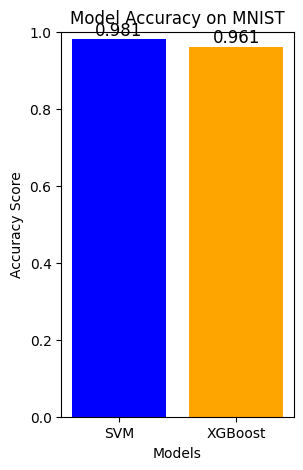

In [20]:
# ---- Plot 1: Bar Chart for Accuracy ----
plt.figure(figsize=(3, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange'])

# Annotate accuracy scores on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy on MNIST')
plt.ylim(0, 1)  # Accuracy range
plt.show()

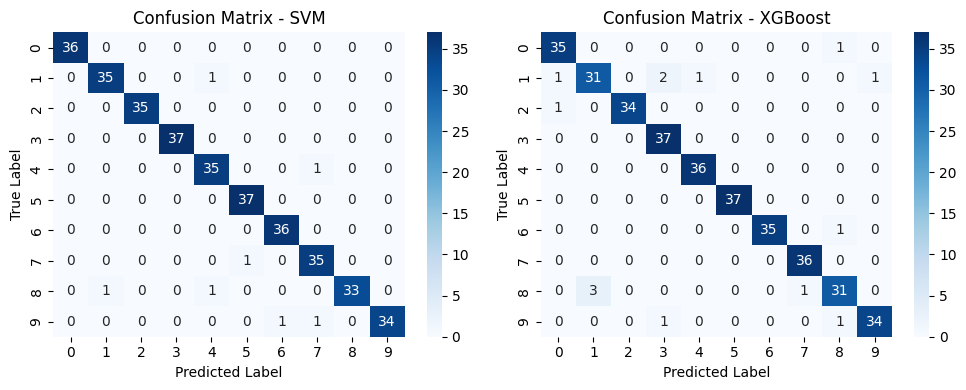

In [23]:
# ---- Plot 2 & 3: Confusion Matrices ----
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

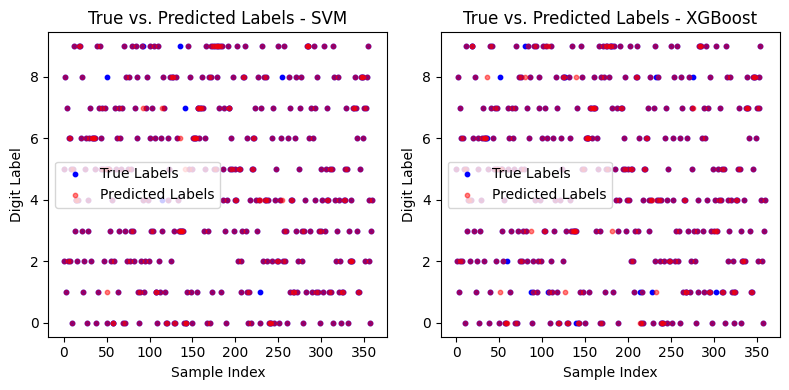

In [25]:
# ---- Plot 4 & 5: True vs. Predicted Labels (Scatter Plots) ----
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax, (name, y_pred) in zip(axes, predictions.items()):
    ax.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', s=10)
    ax.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted Labels', s=10)
    ax.set_title(f'True vs. Predicted Labels - {name}')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Digit Label')
    ax.legend()

plt.tight_layout()
plt.show()